In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


Precisión del modelo: 0.77


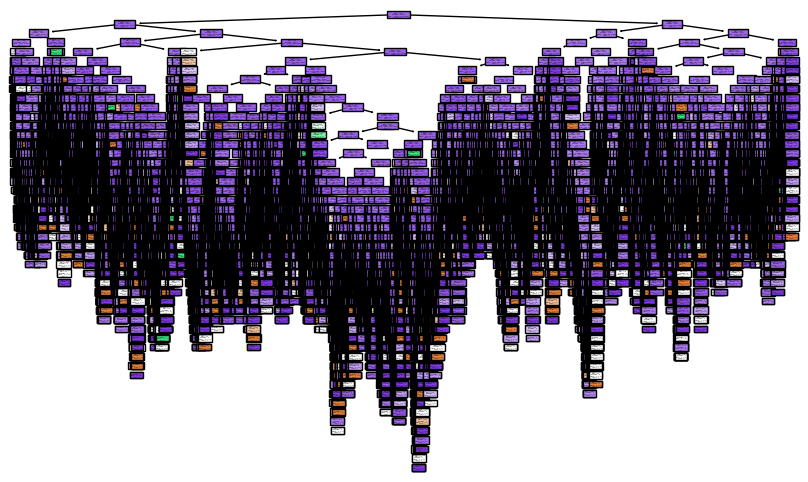

In [2]:
# Cargar los datos
data = pd.read_csv('archivo_limpio.csv')

# Seleccionar las columnas relevantes y la variable objetivo
columns = ['EDADHOM', 'EDADMUJ', 'GETHOM', 'GETMUJ', 'OCUHOM', 'OCUMUJ']
target = 'CLAUNI'

# Filtrar los datos y eliminar las filas con valores faltantes
filtered_data = data[columns + [target]].dropna()

# Filtrar los datos y eliminar las filas con valores que se deben ignorar en 'CLAUNI', 'GETHOM', 'GETMUJ', 'EDADHOM' y 'EDADMUJ'como 999 y 9
filtered_data = data[(data['EDADHOM'] < 150) & (data['EDADMUJ'] < 150) & (data['GETHOM'] < 5) & (data['GETMUJ'] < 5) & (data['CLAUNI'] < 5)]

# Separar los datos en conjunto de entrenamiento y prueba
X = filtered_data[columns]
y = filtered_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=columns, class_names=[str(c) for c in tree.classes_], filled=True)
plt.show()
